<a href="https://colab.research.google.com/github/josiaspro20/Insurance-data-EDA-analysis-ML-models/blob/main/Analysis_and_apply_some_models_(Insurance_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Medical Insurance Cost

### Content
- age
- bmi
- children
- smoker (yes/no)
- region
- charges (target)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
# Data Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
# Model Evaluation
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Model Selection
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import train_test_split

import warnings
def warn(*args,**kwargs):
  pass
warnings.warn = warn

# **Importing datasets** ⛳

In [ ]:
df = pd.read_csv('/content/sample_data/insurance.csv')
df.head()
data = df.copy()

# **DATA VISUALIZATION**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
stats_df = df.describe()
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
median,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### If we look at the mean and median we can notice that 
- age, bmi and children almost normally distributed.
- charges skewed right.

#### There is no negative value

In [ ]:
# check duplicated values
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# drop duplicated values
df.drop_duplicates(inplace=True)

## **EXPLORATORY DATA ANALYSIS**

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Below we will define somme plot helping functions

In [ ]:
def subplots(x,y):
    fig, axis = plt.subplots(x, y, figsize=(20,10))
    fig.tight_layout() # to fit
    return axis

In [ ]:
def get_sum_precent(ax, y):
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width(), height, '{:1.1f}%'.format((height/df[y].sum())*100), ha="center", fontsize=15)

In [ ]:
def get_count_precent(ax):
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()-0., height, '{:1.1f}%'.format((height/len(df))*100), ha="center", fontsize=15)

In [ ]:
def count_plot(features, df):
  axis = subplots(2, 3)
  index = 0
  for i in range(2):
      for j in range(3):
        if index == len(features):
          break
        ax = sns.countplot(ax=axis[i][j],x=features[index],data=df)
        get_count_precent(ax)
        index += 1

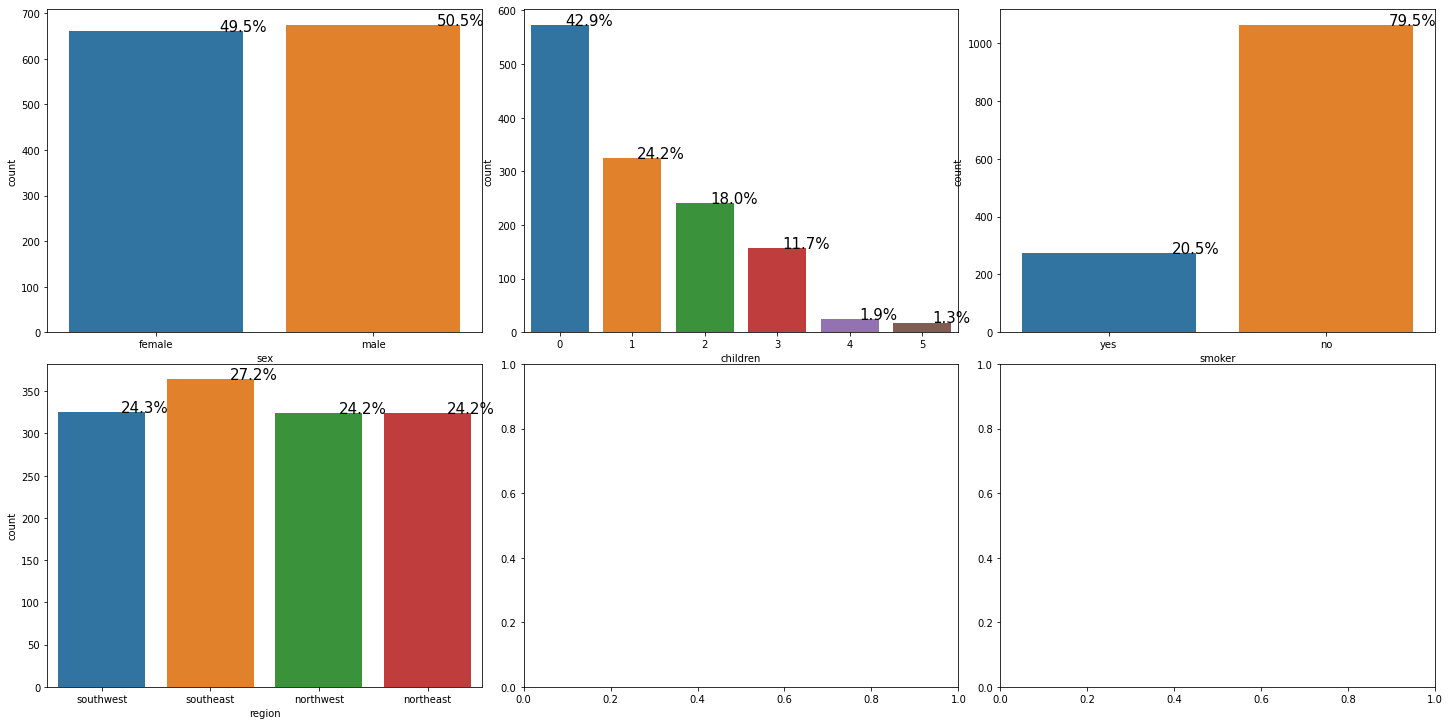

In [ ]:
categorical_features = ['sex', 'children', 'smoker', 'region']
count_plot(categorical_features, df)

- The numbers of males and females are almost the same.
- most of pepole don't have children.
- with 5 persons there is about one somkes.
- most region is southeast.

In [ ]:
def box_plot(features, df):
  fig, axis = plt.subplots((len(features) // 3), 3, figsize=(20,10))  
  fig.tight_layout()
  for i in range((len(features) // 3)):
      for j in range(3):
        ax = sns.boxplot(ax=axis[j],x=features[j],data=df)

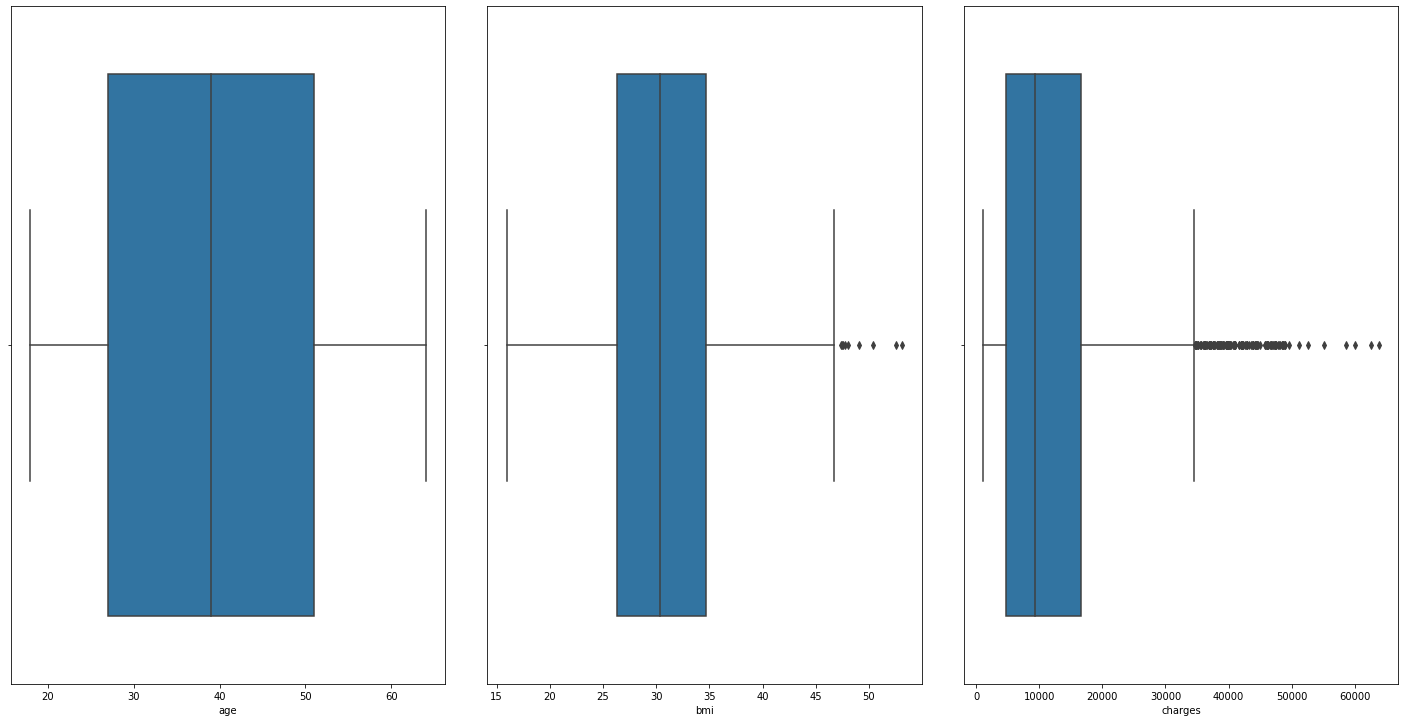

In [ ]:
numerical_features = ['age', 'bmi', 'charges']
box_plot(numerical_features, df)

- bmi and charges contain outliers

### Multivariate analysis

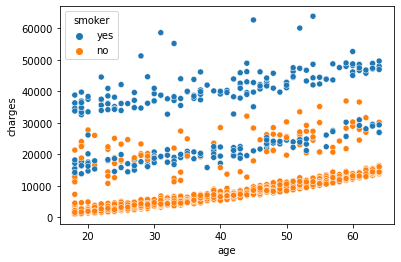

In [ ]:
sns.scatterplot(x='age', y='charges', hue="smoker", data=df)

- age only don't effect on charges
- smoking means high charges you will pay

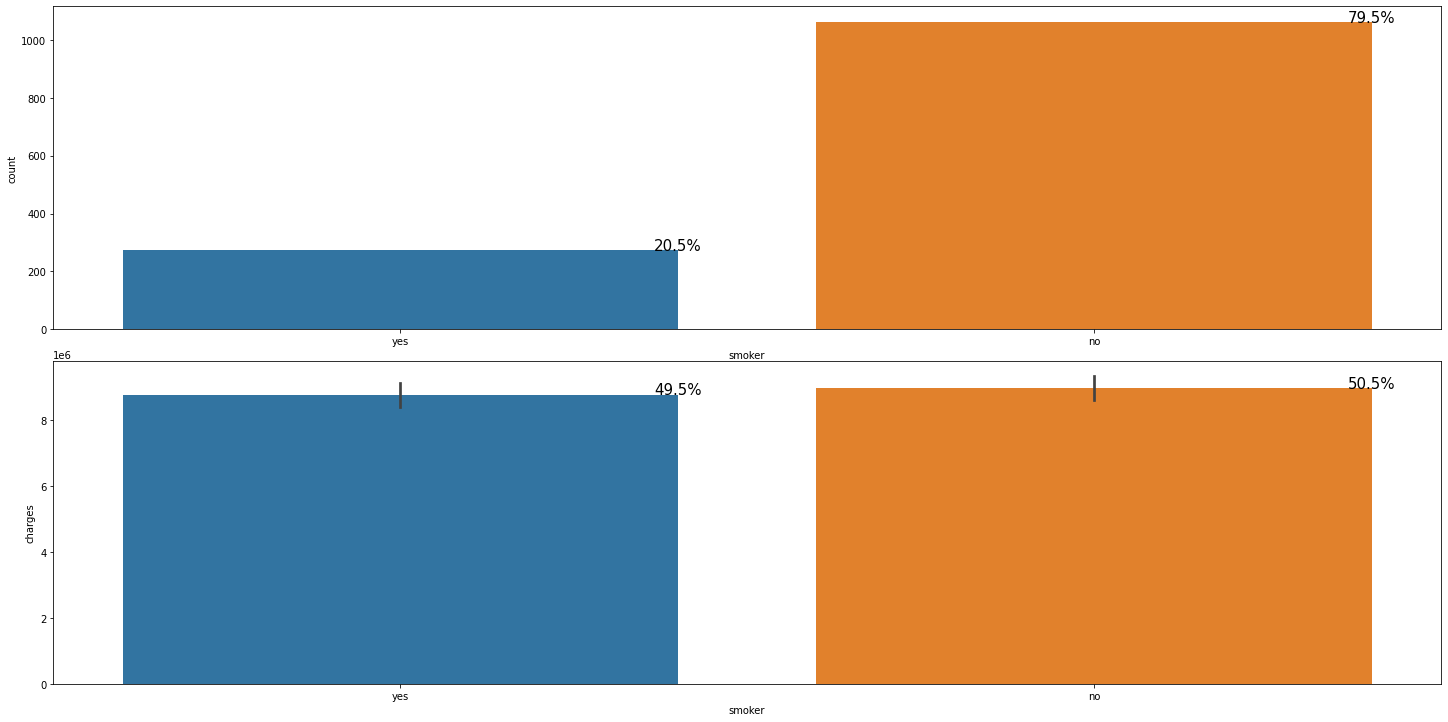

In [ ]:
axis = subplots(2,1)
ax = sns.countplot(ax=axis[0],x='smoker',data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1],x='smoker', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')

- Even though the number of smokers is about 20% but in amount of charges smokers are paid as non-smokers paid

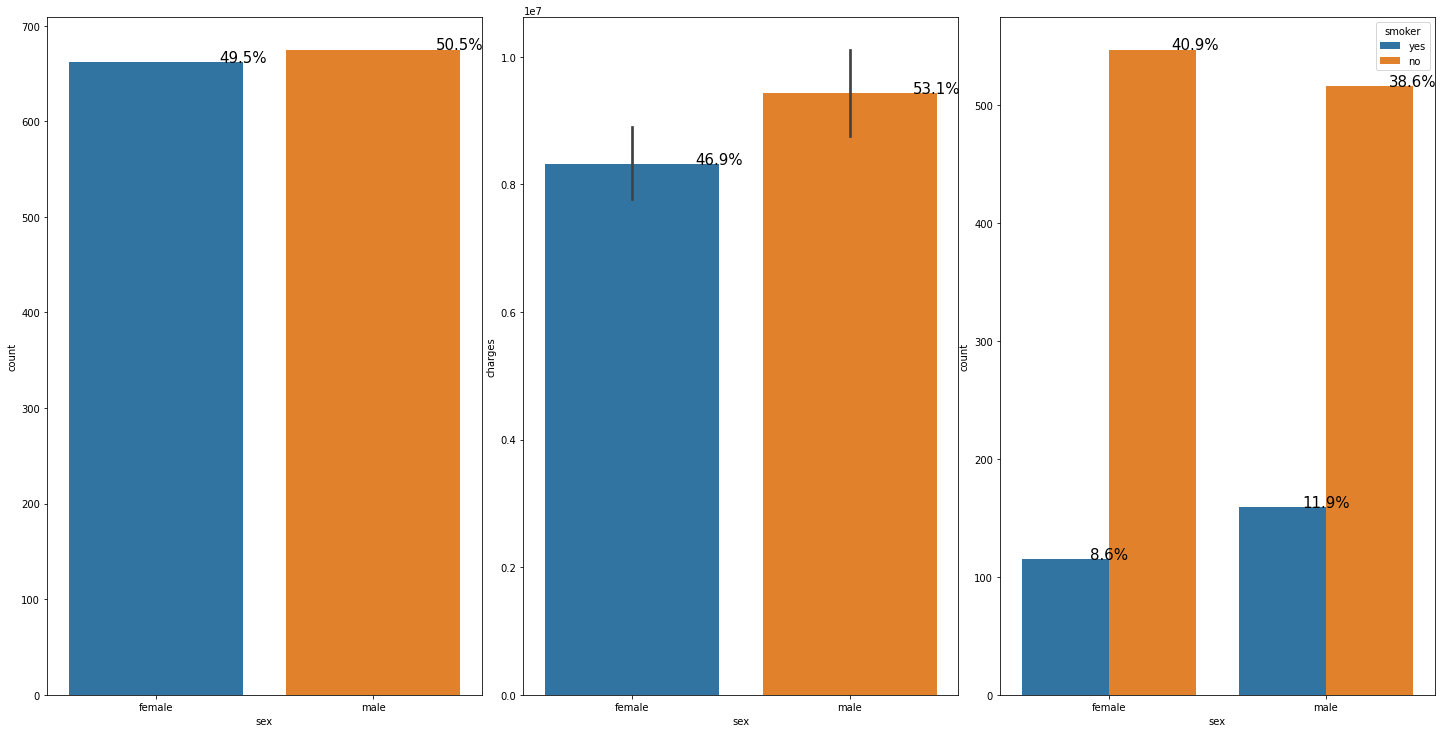

In [ ]:
axis = subplots(1,3)
ax = sns.countplot(ax=axis[0], x='sex', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='sex', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')
ax = sns.countplot(ax=axis[2], x='sex', hue='smoker', data=df)
get_count_precent(ax)

- Males and females are approximatly equally balanced (Blanaced Data).
- Males pay charges more than females because number of male smokers are greater than female smokers.

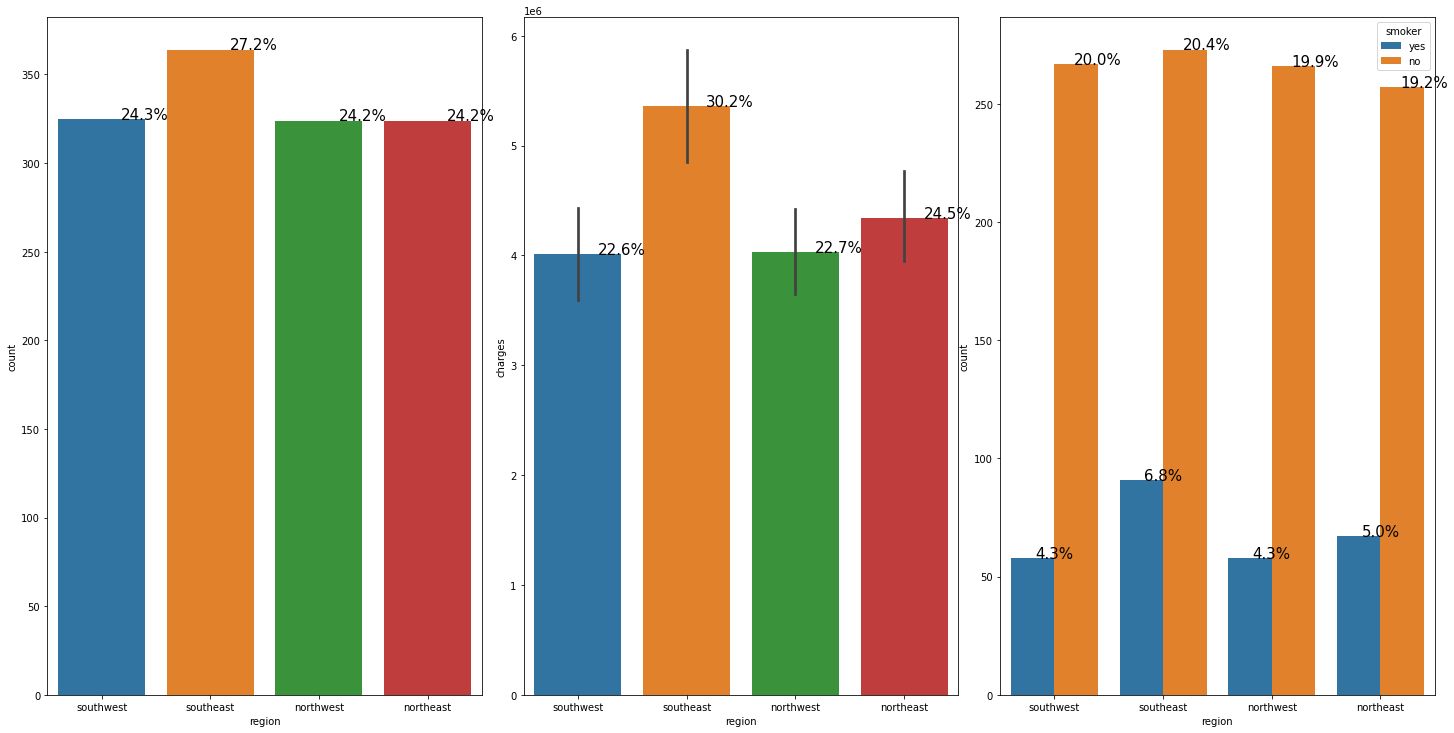

In [ ]:
axis = subplots(1,3)
ax = sns.countplot(ax=axis[0], x='region', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='region', y='charges', data=df, estimator=sum)
get_sum_precent(ax, 'charges')
ax = sns.countplot(ax=axis[2], x='region', hue='smoker', data=df)
get_count_precent(ax)

- Southeast is the most region in paying charges because it contains the highest number of smokers

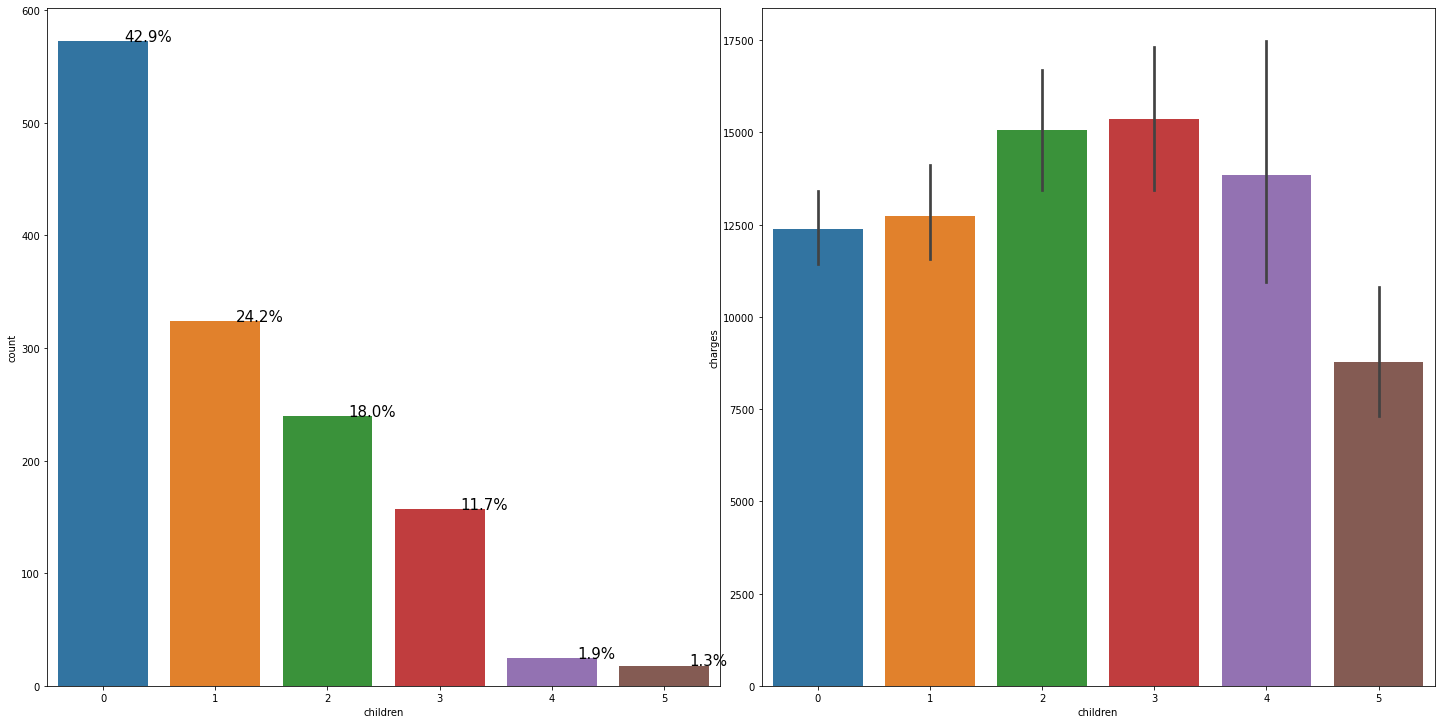

In [ ]:
axis = subplots(1,2)
ax = sns.countplot(ax=axis[0], x='children', data=df)
get_count_precent(ax)
ax = sns.barplot(ax=axis[1], x='children', y='charges', data=df)

- number of children in the data is imbalance but when take the mean to each one we notice that it don't effect on the charges

In [ ]:
df_new = pd.get_dummies(df, columns=['sex', 'region', 'children', 'smoker'])

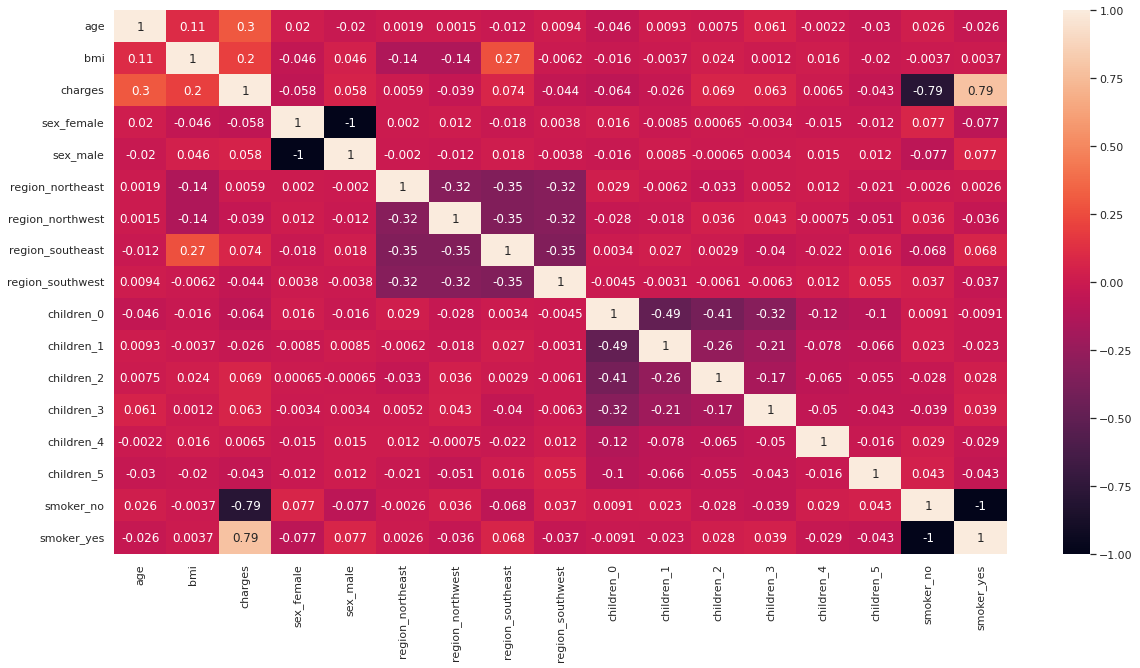

In [ ]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.heatmap(df_new.corr(), annot=True);

- we can see that most features are not linearly correlated.

<h1 style="text-align:center; font-size:100px; color:#651fff">Conclusion</h1>

---



- Age doesn't affect the charges.
- Smoking lead to high charges.
- Southeast has high charges because it contians high smokers.
- Males smokers more than females so, they pay more charges.
- number of children don't effect on charges.